In [ ]:
%pip install scikit-learn
%pip install seaborn
%pip install scipy
%pip install db-dtypes
%pip install -U scikit-learn
%pip install openpyxl
%pip install matplotlib

In [ ]:
%pip install plotly

In [2]:
#importamos todas las librerías necesarias
import pandas as pd
import datetime 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import sys
import shutil

from dotenv import load_dotenv
from datetime import date, timedelta
from prophet.diagnostics import cross_validation, performance_metrics
from sklearn.ensemble import IsolationForest

In [3]:
src_path = os.path.join(os.path.dirname(os.getcwd()), 'src/ci-345_controles-valores-de-unidad-de-fondo')
sys.path.append(src_path)

from data.make_dataset import modify_data, bq_consulta
from data.analytics import historic, rename, analisis, prueba_shapiro
from utils.sql import sql_text

/home/aescobag@PROTECCION.LOCAL/ci-345_controles-valores-de-unidad-de-fondo/venv/lib/python3.7/site-packages/google/auth/__init__.py:55: Python37DeprecationWarning: After January 1, 2024, new releases of this library will drop support for Python 3.7. More details about Python 3.7 support can be found at https://cloud.google.com/python/docs/python37-sunset/
  warnings.warn(message, Python37DeprecationWarning)
/home/aescobag@PROTECCION.LOCAL/ci-345_controles-valores-de-unidad-de-fondo/venv/lib/python3.7/site-packages/google/oauth2/__init__.py:40: Python37DeprecationWarning: After January 1, 2024, new releases of this library will drop support for Python 3.7. More details about Python 3.7 support can be found at https://cloud.google.com/python/docs/python37-sunset/
  warnings.warn(message, Python37DeprecationWarning)


In [4]:
dfrme = bq_consulta(sql_text)

/home/aescobag@PROTECCION.LOCAL/ci-345_controles-valores-de-unidad-de-fondo/venv/lib/python3.7/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/home/aescobag@PROTECCION.LOCAL/ci-345_controles-valores-de-unidad-de-fondo/venv/lib/python3.7/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [7]:
dfrme['VALOR_NOMINAL_OP'].isna().sum()

3259757

In [5]:
dfrme['FECHA_VALORACION'] = pd.to_datetime(dfrme['FECHA_VALORACION'], dayfirst=True)
#dfrme_study['FECHA_VALORACION'] = pd.to_datetime(dfrme_study['FECHA_VALORACION'], dayfirst=True)

In [6]:
dfrme = dfrme[dfrme['NEMOTECNICO'] != '']

In [7]:
dfrme

,FECHA_VALORACION,MAX_DATE,CLASE_INVERSION,VALOR_INTERESES,VALOR_NOMINAL_OP,NEMOTECNICO,CAMBIO,CONTEO
0,2023-02-01,2023-06-26,CDT,NaN,NaN,: CDTBTG80P,-0.027040,146
1,2023-02-02,2023-06-26,CDT,NaN,NaN,: CDTBTG80P,-0.016190,146
2,2023-02-03,2023-06-26,CDT,NaN,NaN,: CDTBTG80P,-0.023839,146
3,2023-02-04,2023-06-26,CDT,NaN,NaN,: CDTBTG80P,-0.022743,146
4,2023-02-05,2023-06-26,CDT,NaN,NaN,: CDTBTG80P,NaN,146
...,...,...,...,...,...,...,...,...
586963,2023-12-22,2023-12-26,TSUV,NaN,NaN,TUVT32160649,0.131186,2447
586964,2023-12-23,2023-12-26,TSUV,NaN,NaN,TUVT32160649,0.153671,2447
586965,2023-12-24,2023-12-26,TSUV,NaN,NaN,TUVT32160649,0.141892,2447
586966,2023-12-25,2023-12-26,TSUV,NaN,NaN,TUVT32160649,0.113370,2447


In [ ]:
dfrme['CLASE_INVERSION'].unique()

array(['CDT', 'BOENVS', 'ABEVS', 'BOEVS', 'BOEOM', 'TDPIT', 'BHIP',
       'AAEVS', 'AEE', 'BOEEDB', 'AMEVS', 'BPEN', 'ABENVS', 'AMENVS',
       None, 'TREP', 'AAENVS', 'TPENVS', 'TPMTIN', 'PCCBCTP', 'TCCH',
       'PCENVS', 'TCCENVS', 'TCCTIN', 'TCCEVS', 'TSTF', 'TIDIS', 'TSUV',
       'TSEGE'], dtype=object)

In [8]:
df_encoded = pd.get_dummies(dfrme, columns=['CLASE_INVERSION', ])

In [9]:
df_encoded

,FECHA_VALORACION,MAX_DATE,VALOR_INTERESES,VALOR_NOMINAL_OP,NEMOTECNICO,CAMBIO,CONTEO,CLASE_INVERSION_AAENVS,CLASE_INVERSION_AAEVS,CLASE_INVERSION_ABENVS,...,CLASE_INVERSION_CDT,CLASE_INVERSION_PCCBCTP,CLASE_INVERSION_PCENVS,CLASE_INVERSION_TCCEVS,CLASE_INVERSION_TCCH,CLASE_INVERSION_TDPIT,CLASE_INVERSION_TPMTIN,CLASE_INVERSION_TREP,CLASE_INVERSION_TSTF,CLASE_INVERSION_TSUV
0,2023-02-01,2023-06-26,NaN,NaN,: CDTBTG80P,-0.027040,146,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2023-02-02,2023-06-26,NaN,NaN,: CDTBTG80P,-0.016190,146,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2023-02-03,2023-06-26,NaN,NaN,: CDTBTG80P,-0.023839,146,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,2023-02-04,2023-06-26,NaN,NaN,: CDTBTG80P,-0.022743,146,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2023-02-05,2023-06-26,NaN,NaN,: CDTBTG80P,NaN,146,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586963,2023-12-22,2023-12-26,NaN,NaN,TUVT32160649,0.131186,2447,0,0,0,...,0,0,0,0,0,0,0,0,0,1
586964,2023-12-23,2023-12-26,NaN,NaN,TUVT32160649,0.153671,2447,0,0,0,...,0,0,0,0,0,0,0,0,0,1
586965,2023-12-24,2023-12-26,NaN,NaN,TUVT32160649,0.141892,2447,0,0,0,...,0,0,0,0,0,0,0,0,0,1
586966,2023-12-25,2023-12-26,NaN,NaN,TUVT32160649,0.113370,2447,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
df_encoded.sort_values(by = 'CONTEO')

,FECHA_VALORACION,MAX_DATE,VALOR_INTERESES,VALOR_NOMINAL_OP,NEMOTECNICO,CAMBIO,CONTEO,CLASE_INVERSION_AAENVS,CLASE_INVERSION_AAEVS,CLASE_INVERSION_ABENVS,...,CLASE_INVERSION_CDT,CLASE_INVERSION_PCCBCTP,CLASE_INVERSION_PCENVS,CLASE_INVERSION_TCCEVS,CLASE_INVERSION_TCCH,CLASE_INVERSION_TDPIT,CLASE_INVERSION_TPMTIN,CLASE_INVERSION_TREP,CLASE_INVERSION_TSTF,CLASE_INVERSION_TSUV
495928,2023-12-26,2023-12-26,NaN,NaN,NUAM,0.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
527931,2023-12-19,2023-12-26,NaN,NaN,PORT,0.014378,8,1,0,0,...,0,0,0,0,0,0,0,0,0,0
527932,2023-12-20,2023-12-26,NaN,NaN,PORT,-0.003519,8,1,0,0,...,0,0,0,0,0,0,0,0,0,0
527933,2023-12-21,2023-12-26,NaN,NaN,PORT,0.000000,8,1,0,0,...,0,0,0,0,0,0,0,0,0,0
527934,2023-12-22,2023-12-26,NaN,NaN,PORT,0.000000,8,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296619,2021-04-24,2023-12-26,4588000.0,2.000000e+09,CDTBBO80,-0.001704,5727,0,0,0,...,1,0,0,0,0,0,0,0,0,0
296620,2021-04-25,2023-12-26,NaN,NaN,CDTBBO80,0.005916,5727,0,0,0,...,1,0,0,0,0,0,0,0,0,0
296621,2021-04-26,2023-12-26,NaN,NaN,CDTBBO80,0.005147,5727,0,0,0,...,1,0,0,0,0,0,0,0,0,0
296601,2021-04-14,2023-12-26,NaN,NaN,CDTBBO80,0.003105,5727,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [17]:
encoding_map_1 = df_encoded['NEMOTECNICO'].value_counts().to_dict()
df_encoded['NEMOTECNICO_encoded'] = df_encoded['NEMOTECNICO'].map(encoding_map_1)

In [16]:
df_encoded

,FECHA_VALORACION,MAX_DATE,VALOR_INTERESES,VALOR_NOMINAL_OP,NEMOTECNICO,CAMBIO,CONTEO,CLASE_INVERSION_AAENVS,CLASE_INVERSION_AAEVS,CLASE_INVERSION_ABENVS,...,CLASE_INVERSION_PCCBCTP,CLASE_INVERSION_PCENVS,CLASE_INVERSION_TCCEVS,CLASE_INVERSION_TCCH,CLASE_INVERSION_TDPIT,CLASE_INVERSION_TPMTIN,CLASE_INVERSION_TREP,CLASE_INVERSION_TSTF,CLASE_INVERSION_TSUV,NEMOTECNICO_encoded
0,2023-02-01,2023-06-26,NaN,NaN,: CDTBTG80P,-0.027040,146,0,0,0,...,0,0,0,0,0,0,0,0,0,146
1,2023-02-02,2023-06-26,NaN,NaN,: CDTBTG80P,-0.016190,146,0,0,0,...,0,0,0,0,0,0,0,0,0,146
2,2023-02-03,2023-06-26,NaN,NaN,: CDTBTG80P,-0.023839,146,0,0,0,...,0,0,0,0,0,0,0,0,0,146
3,2023-02-04,2023-06-26,NaN,NaN,: CDTBTG80P,-0.022743,146,0,0,0,...,0,0,0,0,0,0,0,0,0,146
4,2023-02-05,2023-06-26,NaN,NaN,: CDTBTG80P,NaN,146,0,0,0,...,0,0,0,0,0,0,0,0,0,146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586963,2023-12-22,2023-12-26,NaN,NaN,TUVT32160649,0.131186,2447,0,0,0,...,0,0,0,0,0,0,0,0,1,2447
586964,2023-12-23,2023-12-26,NaN,NaN,TUVT32160649,0.153671,2447,0,0,0,...,0,0,0,0,0,0,0,0,1,2447
586965,2023-12-24,2023-12-26,NaN,NaN,TUVT32160649,0.141892,2447,0,0,0,...,0,0,0,0,0,0,0,0,1,2447
586966,2023-12-25,2023-12-26,NaN,NaN,TUVT32160649,0.113370,2447,0,0,0,...,0,0,0,0,0,0,0,0,1,2447


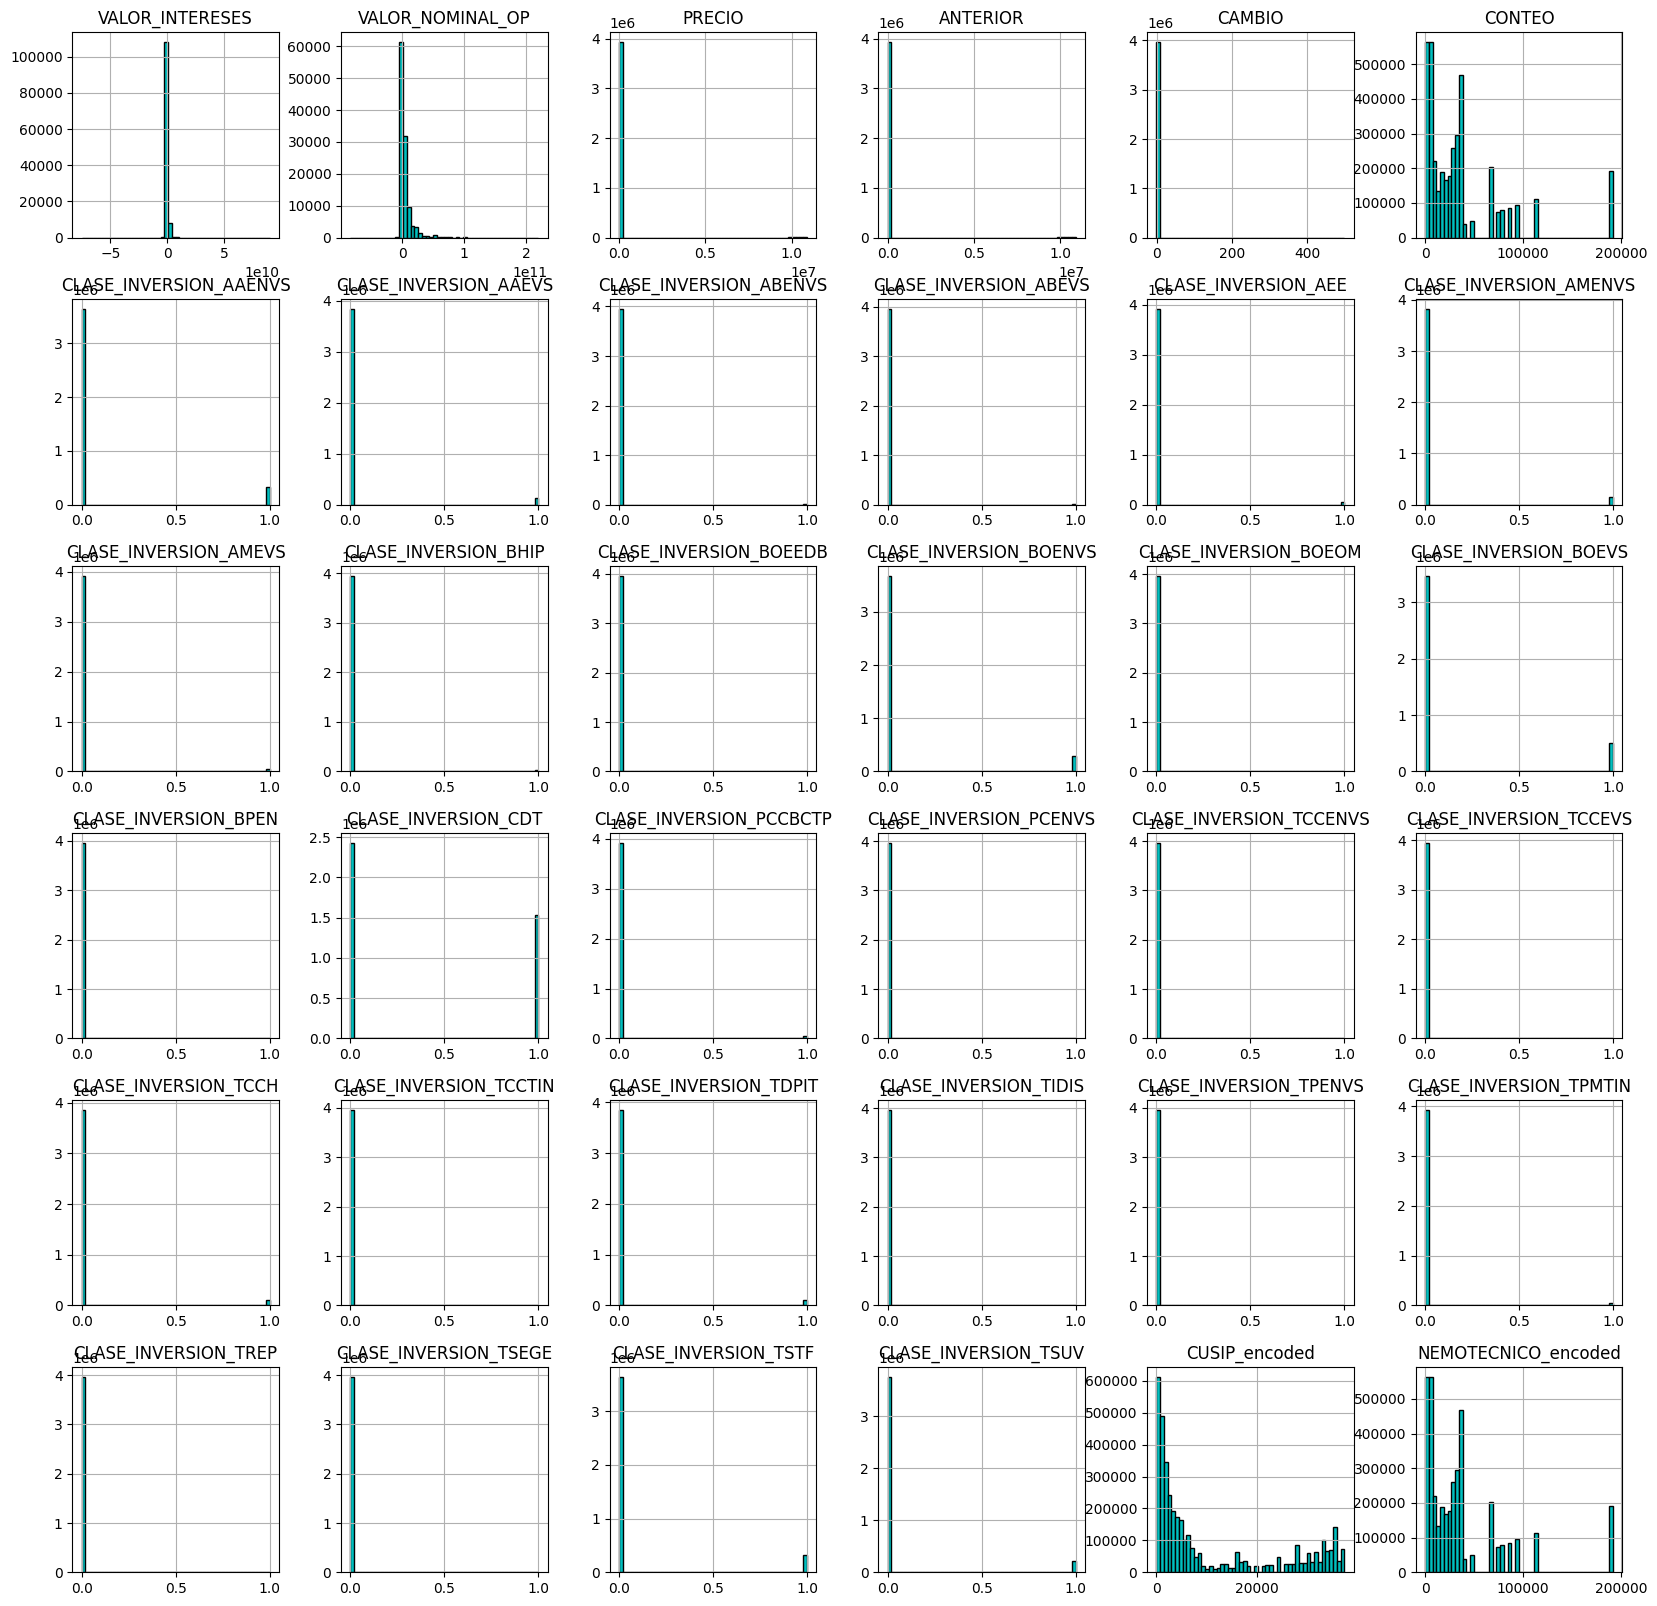

In [ ]:
dfrme_hist = df_encoded
dfrme_hist.drop(columns=['FECHA_VALORACION','NEMOTECNICO']).hist(figsize=(20,20), bins = 50, color = "c", edgecolor='black')
plt.show()

In [19]:
df_encoded = df_encoded.drop(columns=['NEMOTECNICO'])

In [20]:
df_encoded

,FECHA_VALORACION,MAX_DATE,VALOR_INTERESES,VALOR_NOMINAL_OP,CAMBIO,CONTEO,CLASE_INVERSION_AAENVS,CLASE_INVERSION_AAEVS,CLASE_INVERSION_ABENVS,CLASE_INVERSION_ABEVS,...,CLASE_INVERSION_PCCBCTP,CLASE_INVERSION_PCENVS,CLASE_INVERSION_TCCEVS,CLASE_INVERSION_TCCH,CLASE_INVERSION_TDPIT,CLASE_INVERSION_TPMTIN,CLASE_INVERSION_TREP,CLASE_INVERSION_TSTF,CLASE_INVERSION_TSUV,NEMOTECNICO_encoded
0,2023-02-01,2023-06-26,NaN,NaN,-0.027040,146,0,0,0,0,...,0,0,0,0,0,0,0,0,0,146
1,2023-02-02,2023-06-26,NaN,NaN,-0.016190,146,0,0,0,0,...,0,0,0,0,0,0,0,0,0,146
2,2023-02-03,2023-06-26,NaN,NaN,-0.023839,146,0,0,0,0,...,0,0,0,0,0,0,0,0,0,146
3,2023-02-04,2023-06-26,NaN,NaN,-0.022743,146,0,0,0,0,...,0,0,0,0,0,0,0,0,0,146
4,2023-02-05,2023-06-26,NaN,NaN,NaN,146,0,0,0,0,...,0,0,0,0,0,0,0,0,0,146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586963,2023-12-22,2023-12-26,NaN,NaN,0.131186,2447,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2447
586964,2023-12-23,2023-12-26,NaN,NaN,0.153671,2447,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2447
586965,2023-12-24,2023-12-26,NaN,NaN,0.141892,2447,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2447
586966,2023-12-25,2023-12-26,NaN,NaN,0.113370,2447,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2447


In [21]:
df_encoded['PAGO'] = df_encoded['VALOR_INTERESES'].apply(lambda x: 1 if x > 0 else 0)

In [22]:
df_encoded

,FECHA_VALORACION,MAX_DATE,VALOR_INTERESES,VALOR_NOMINAL_OP,CAMBIO,CONTEO,CLASE_INVERSION_AAENVS,CLASE_INVERSION_AAEVS,CLASE_INVERSION_ABENVS,CLASE_INVERSION_ABEVS,...,CLASE_INVERSION_PCENVS,CLASE_INVERSION_TCCEVS,CLASE_INVERSION_TCCH,CLASE_INVERSION_TDPIT,CLASE_INVERSION_TPMTIN,CLASE_INVERSION_TREP,CLASE_INVERSION_TSTF,CLASE_INVERSION_TSUV,NEMOTECNICO_encoded,PAGO
0,2023-02-01,2023-06-26,NaN,NaN,-0.027040,146,0,0,0,0,...,0,0,0,0,0,0,0,0,146,0
1,2023-02-02,2023-06-26,NaN,NaN,-0.016190,146,0,0,0,0,...,0,0,0,0,0,0,0,0,146,0
2,2023-02-03,2023-06-26,NaN,NaN,-0.023839,146,0,0,0,0,...,0,0,0,0,0,0,0,0,146,0
3,2023-02-04,2023-06-26,NaN,NaN,-0.022743,146,0,0,0,0,...,0,0,0,0,0,0,0,0,146,0
4,2023-02-05,2023-06-26,NaN,NaN,NaN,146,0,0,0,0,...,0,0,0,0,0,0,0,0,146,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586963,2023-12-22,2023-12-26,NaN,NaN,0.131186,2447,0,0,0,0,...,0,0,0,0,0,0,0,1,2447,0
586964,2023-12-23,2023-12-26,NaN,NaN,0.153671,2447,0,0,0,0,...,0,0,0,0,0,0,0,1,2447,0
586965,2023-12-24,2023-12-26,NaN,NaN,0.141892,2447,0,0,0,0,...,0,0,0,0,0,0,0,1,2447,0
586966,2023-12-25,2023-12-26,NaN,NaN,0.113370,2447,0,0,0,0,...,0,0,0,0,0,0,0,1,2447,0


In [139]:
def contaminacion(dataframe):
    # Extraer la serie temporal o valores relevantes
    serie_temporal = dataframe['CAMBIO'].values

    # Calcular el percentil umbral
    umbral = np.percentile(serie_temporal, 90)

    # Contar valores que superan el umbral
    outliers = serie_temporal[serie_temporal > umbral]

    # Calcular la contaminación estimada
    contaminacion = len(outliers) / len(serie_temporal)

    return contaminacion

In [30]:
X = df_encoded.drop(columns=['CONTEO'])

In [31]:
X ['dias'] = (X['FECHA_VALORACION'] - X['FECHA_VALORACION'].min()).dt.days

In [32]:
X = X.drop(columns=['FECHA_VALORACION'])

In [33]:
X['dias'].max()

8760

In [35]:
X = X.replace(np.nan, 0)

In [36]:
X

,MAX_DATE,VALOR_INTERESES,VALOR_NOMINAL_OP,CAMBIO,CLASE_INVERSION_AAENVS,CLASE_INVERSION_AAEVS,CLASE_INVERSION_ABENVS,CLASE_INVERSION_ABEVS,CLASE_INVERSION_AEE,CLASE_INVERSION_AMENVS,...,CLASE_INVERSION_TCCEVS,CLASE_INVERSION_TCCH,CLASE_INVERSION_TDPIT,CLASE_INVERSION_TPMTIN,CLASE_INVERSION_TREP,CLASE_INVERSION_TSTF,CLASE_INVERSION_TSUV,NEMOTECNICO_encoded,PAGO,dias
0,2023-06-26,0.0,0.0,-0.027040,0,0,0,0,0,0,...,0,0,0,0,0,0,0,146,0,8432
1,2023-06-26,0.0,0.0,-0.016190,0,0,0,0,0,0,...,0,0,0,0,0,0,0,146,0,8433
2,2023-06-26,0.0,0.0,-0.023839,0,0,0,0,0,0,...,0,0,0,0,0,0,0,146,0,8434
3,2023-06-26,0.0,0.0,-0.022743,0,0,0,0,0,0,...,0,0,0,0,0,0,0,146,0,8435
4,2023-06-26,0.0,0.0,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,146,0,8436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586963,2023-12-26,0.0,0.0,0.131186,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2447,0,8756
586964,2023-12-26,0.0,0.0,0.153671,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2447,0,8757
586965,2023-12-26,0.0,0.0,0.141892,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2447,0,8758
586966,2023-12-26,0.0,0.0,0.113370,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2447,0,8759


In [37]:
X_t = X[X['dias'] <= 8716]

In [38]:
X_t = X.drop(columns = 'PAGO')

In [39]:
X_t = X.drop(columns = 'MAX_DATE')

In [53]:
Y = X[X['dias'] > 8716]

In [54]:
Y_t = Y.drop(columns = 'PAGO')

In [55]:
Y_t = Y.drop(columns = 'MAX_DATE')

In [43]:
Y_t

,VALOR_INTERESES,VALOR_NOMINAL_OP,CAMBIO,CLASE_INVERSION_AAENVS,CLASE_INVERSION_AAEVS,CLASE_INVERSION_ABENVS,CLASE_INVERSION_ABEVS,CLASE_INVERSION_AEE,CLASE_INVERSION_AMENVS,CLASE_INVERSION_AMEVS,...,CLASE_INVERSION_TCCEVS,CLASE_INVERSION_TCCH,CLASE_INVERSION_TDPIT,CLASE_INVERSION_TPMTIN,CLASE_INVERSION_TREP,CLASE_INVERSION_TSTF,CLASE_INVERSION_TSUV,NEMOTECNICO_encoded,PAGO,dias
2300,0.0,0.0,0.000000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2232,0,8683
2301,0.0,0.0,0.000000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2232,0,8684
2302,0.0,0.0,0.000000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2232,0,8685
2303,0.0,0.0,0.000000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2232,0,8686
2304,0.0,0.0,0.000000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2232,0,8687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586963,0.0,0.0,0.131186,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2447,0,8756
586964,0.0,0.0,0.153671,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2447,0,8757
586965,0.0,0.0,0.141892,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2447,0,8758
586966,0.0,0.0,0.113370,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2447,0,8759


In [162]:
contaminacion(X_t)

0.1000003407340775

In [172]:
modelo_deteccion = IsolationForest(n_estimators=100,max_samples='auto',contamination=0.5,random_state=42)
modelo_deteccion.fit(X_t.to_numpy())
    

IsolationForest(contamination=0.5, random_state=42)

In [190]:
modelo_salida = modelo_deteccion.predict(X_t.to_numpy())

In [192]:
result_df = pd.DataFrame({'dias':X_t['dias'],'CAMBIO': X_t['CAMBIO'],'NEMOTECNICO_encoded':X_t['NEMOTECNICO_encoded'], 'outliers': [1 if x == 1 else -1 for x in modelo_salida]})

In [193]:
result_df['outliers'].unique()

array([-1,  1])

In [194]:
result_df['FECHA_VALORACION'] = pd.to_datetime('2000-01-01') + pd.to_timedelta(result_df['dias'], unit='D')

In [195]:
result_df = result_df.set_index('FECHA_VALORACION').reset_index()
result_df.drop(columns = 'dias').sort_values(by='CAMBIO')

,FECHA_VALORACION,CAMBIO,NEMOTECNICO_encoded,outliers
286884,2018-03-18,-0.998236,2234,-1
286885,2018-03-19,-0.998235,2234,-1
286917,2018-04-20,-0.998219,2234,-1
286909,2018-04-12,-0.998194,2234,-1
286915,2018-04-18,-0.998193,2234,-1
...,...,...,...,...
287244,2019-03-13,534.426009,2234,-1
287287,2019-04-24,541.731278,2234,-1
287286,2019-04-24,541.731278,2234,-1
287402,2019-08-17,552.303965,2234,-1


In [196]:
result_df[result_df['CAMBIO'] > 0.2]['outliers'].unique()

array([-1,  1])

In [197]:
inverted_encoding_map_1 = {v: k for k, v in encoding_map_1.items()}

# Ahora, puedes aplicar la inversión para obtener los objetos originales
result_df['NEMOTECNICO'] = result_df['NEMOTECNICO_encoded'].map(inverted_encoding_map_1)

In [198]:
result_df[result_df['CAMBIO']  < 0.03]

,FECHA_VALORACION,dias,CAMBIO,NEMOTECNICO_encoded,outliers,NEMOTECNICO
0,2023-02-01,8432,-0.027040,146,-1,: CDTBTG80P
1,2023-02-02,8433,-0.016190,146,-1,: CDTBTG80P
2,2023-02-03,8434,-0.023839,146,-1,: CDTBTG80P
3,2023-02-04,8435,-0.022743,146,-1,: CDTBTG80P
4,2023-02-05,8436,0.000000,146,-1,: CDTBTG80P
...,...,...,...,...,...,...
586950,2023-12-09,8743,-0.019928,2447,-1,TUVT32160649
586951,2023-12-10,8744,-0.002098,2447,-1,TUVT32160649
586952,2023-12-11,8745,-0.031059,2447,-1,TUVT32160649
586953,2023-12-12,8746,0.013552,2447,-1,TUVT32160649


In [199]:
result_df[result_df['NEMOTECNICO'] == 'TUVT32160649']

,FECHA_VALORACION,dias,CAMBIO,NEMOTECNICO_encoded,outliers,NEMOTECNICO
584521,2018-01-31,6605,-0.067866,2447,-1,TUVT32160649
584522,2018-02-01,6606,0.056456,2447,-1,TUVT32160649
584523,2018-02-02,6607,-0.168019,2447,-1,TUVT32160649
584524,2018-02-03,6608,-0.076946,2447,-1,TUVT32160649
584525,2018-02-04,6609,-0.141128,2447,-1,TUVT32160649
...,...,...,...,...,...,...
586963,2023-12-22,8756,0.131186,2447,-1,TUVT32160649
586964,2023-12-23,8757,0.153671,2447,-1,TUVT32160649
586965,2023-12-24,8758,0.141892,2447,-1,TUVT32160649
586966,2023-12-25,8759,0.113370,2447,-1,TUVT32160649


/home/aescobag@PROTECCION.LOCAL/ci-345_controles-valores-de-unidad-de-fondo/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


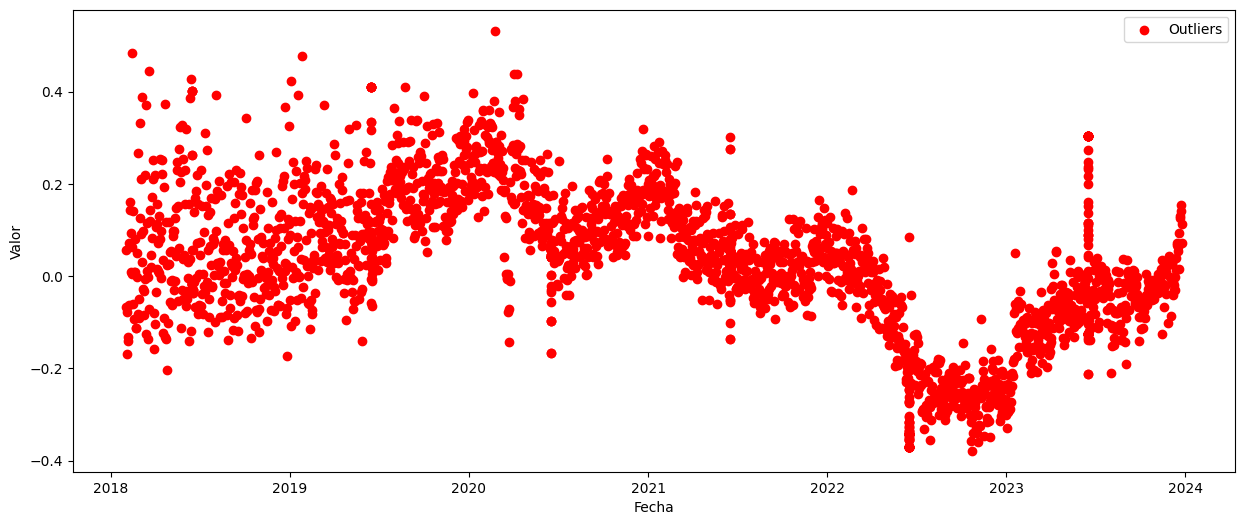

In [202]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='FECHA_VALORACION', y='CAMBIO', color='b',data= result_df[result_df['NEMOTECNICO'] == 2447 ],label='line')
outliers = result_df[result_df['outliers'] == -1][result_df['NEMOTECNICO'] == 'TUVT32160649']
plt.scatter(x=outliers['FECHA_VALORACION'], y=outliers['CAMBIO'], color='red', label='Outliers')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
%pip install sqlalchemy==1.4.46

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)
#alertas.to_sql(name='Valores_unidad_marcados', con = engine)
df_resultados.to_sql(name='Predicciones_isol', con = engine)

In [ ]:
import pandas_gbq
def send_data():
   load_dotenv()
   df_resultados['outliers'] = df_resultados['outliers'].astype(str).apply(lambda x: x.encode('utf-8'))
   DESTINATION_PROJECT = os.getenv('DESTINATION_PROJECT')
   DESTINATION_DATASET = os.getenv('DESTINATION_DATASET')
   table_id = f"{DESTINATION_DATASET}.ALERTA_INVERSIONES_PRUEBA"
   return df_resultados.to_gbq(destination_table=table_id, project_id=DESTINATION_PROJECT, if_exists= 'replace')

In [ ]:
send_data()

/home/aescobag@PROTECCION.LOCAL/ci-345_controles-valores-de-unidad-de-fondo/venv/lib/python3.7/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
100%|██████████| 1/1 [00:00<00:00, 6462.72it/s]


In [ ]:
# Obtener la lista de archivos en la carpeta
archivos = os.listdir('/home/aescobag@PROTECCION.LOCAL/ci-345_controles-valores-de-unidad-de-fondo/notebooks/modelos')

# Eliminar los primeros 5 archivos
for i in range(1,633):
    ruta_archivo = os.path.join('/home/aescobag@PROTECCION.LOCAL/ci-345_controles-valores-de-unidad-de-fondo/notebooks/modelos', f'modelo{i}.pkl')
    os.remove(ruta_archivo)
    print(f"Se ha eliminado el archivo: modelo{i}.pkl")


In [ ]:
columnas_prueba = ['ds', 'NEMOTECNICO', 'y', 'outliers']
df_resultados_prueba = pd.DataFrame(columns=columnas_prueba)


In [ ]:
archivos = os.listdir('/home/aescobag@PROTECCION.LOCAL/ci-345_controles-valores-de-unidad-de-fondo/notebooks/modelos')
dic = {}
# Imprimir los primeros cien archivos
for archivo in archivos:
    try:
        modelo_g= open(f'/home/aescobag@PROTECCION.LOCAL/ci-345_controles-valores-de-unidad-de-fondo/notebooks/modelos/{archivo}', 'rb')
        modelo_c = pickle.load(modelo_g)
        archivo = archivo[7:].split('_')
        archivo = archivo[1][:-4]
        pds=original_data_study[archivo]
        modelo_s = modelo_c.predict(pds['f0_'].to_numpy().reshape(-1,1))
        result_df = pd.DataFrame({'ds':pds['ds'],'y': pds['f0_'], 'outliers': [1 if x == 1 else -1 for x in modelo_s]})
        INLIERS = result_df[result_df['outliers']==1]
        OUTLIERS = result_df[result_df['outliers']==-1]
        OUTLIERS = pd.merge(pds[['ds','NEMOTECNICO']], OUTLIERS[['ds','y','outliers']], on = 'ds')
        INLIERS = pd.merge(pds[['ds','NEMOTECNICO']],INLIERS[['ds','y','outliers']],on='ds')
        alertas = OUTLIERS.append(INLIERS,ignore_index=True)
        df_resultados_prueba = df_resultados_prueba.append(alertas,ignore_index=True)
    except KeyError:
        pass


In [ ]:
archivos = os.listdir('/home/aescobag@PROTECCION.LOCAL/ci-345_controles-valores-de-unidad-de-fondo/notebooks/modelos')
# Imprimir los primeros cien archivos
for archivo in archivos:
    try:
        #modelo_c = pickle.load(modelo_g)
        archiv = archivo[7:].split('_')
        archiv = archiv[1][:-4]
        nuevo_nombre = f'modelo_{archiv}.pkl'  # Construye el nuevo nombre del archivo
        vieja_ruta = os.path.join('/home/aescobag@PROTECCION.LOCAL/ci-345_controles-valores-de-unidad-de-fondo/notebooks/modelos', archivo)
        nueva_ruta = os.path.join('/home/aescobag@PROTECCION.LOCAL/ci-345_controles-valores-de-unidad-de-fondo/notebooks/modelos', nuevo_nombre)
        
        # Renombra el archivo
        os.rename(vieja_ruta, nueva_ruta)
        
        print(f'Renombrado: {archivo} -> {nuevo_nombre}')
    except Exception as e:
        print(f'Error al procesar {archivo}: {str(e)}')

In [ ]:
dic


In [ ]:
df_resultados_prueba.to_sql(name='Predicciones_prueba', con = engine)

In [ ]:
df_resultados_prueba

,ds,NEMOTECNICO,y,outliers
0,2023-11-14,PFDAVVNDA,-0.006308,1
1,2023-11-16,PFDAVVNDA,0.000000,1
2,2023-11-20,PFDAVVNDA,-0.017775,1
3,2023-11-23,PFDAVVNDA,0.000000,1
4,2023-11-22,PFDAVVNDA,-0.008866,1
...,...,...,...,...
3999,2023-11-17,CDTBSC80,0.000179,1
4000,2023-11-20,CDTBSC80,-0.000129,1
4001,2023-11-21,CDTBSC80,0.000438,1
4002,2023-11-18,CDTBSC80,0.000379,1


In [ ]:
import pandas_gbq
def send_data_prueba():
   load_dotenv()
   df_resultados_prueba['outliers'] = df_resultados_prueba['outliers'].astype(str).apply(lambda x: x.encode('utf-8'))
   DESTINATION_PROJECT = os.getenv('DESTINATION_PROJECT')
   DESTINATION_DATASET = os.getenv('DESTINATION_DATASET')
   table_id = f"{DESTINATION_DATASET}.ALERTA_INVERSIONES_PRUEBA"
   return df_resultados_prueba.to_gbq(destination_table=table_id, project_id=DESTINATION_PROJECT, if_exists= 'append')

In [ ]:
send_data_prueba()

/home/aescobag@PROTECCION.LOCAL/ci-345_controles-valores-de-unidad-de-fondo/venv/lib/python3.7/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
100%|██████████| 1/1 [00:00<00:00, 5011.12it/s]


In [ ]:
for i in original_data:
    try:
        print(type(original_data_study[i]))
    except KeyError:
        pass

In [ ]:
modelo_salida = modelo_cargado.predict(datos['y'].to_numpy().reshape(-1,1))

In [ ]:
with open('modelo.pkl', 'wb') as modelo_guardado:
    pickle.dump(modelo_deteccion, modelo_guardado)
modelo_guardado= open('modelo.pkl', 'rb')
modelo_cargado = pickle.load(modelo_guardado)

In [ ]:
df_resultados_prueba

In [ ]:
res = df_resultados_prueba[df_resultados_prueba['outliers'] == b'-1']

In [ ]:
pd.set_option('max_rows', None)
res.sort_values(by='ds')

In [ ]:
def lanzar_alerta(fecha:str, NEMOTECNICO:str, valor_unidad):
    datos = pd.DataFrame([[fecha,NEMOTECNICO,valor_unidad]], columns = ['Fecha','NEMOTECNICO', 'valor_unidad'])
    datos['Fecha'] = pd.to_datetime(datos['Fecha'], dayfirst=True)
    nombre_archivo = f'modelo_{NEMOTECNICO}.pkl'
    modelo= open(f'/home/aescobag@PROTECCION.LOCAL/ci-345_controles-valores-de-unidad-de-fondo/notebooks/modelos/{nombre_archivo}', 'rb')
    modelo_cargado = pickle.load(modelo)
    resultado = modelo_cargado.predict(datos['valor_unidad'].to_numpy().reshape(-1,1))
    return resultado

    

In [ ]:
int(lanzar_alerta('2023-11-23','GRUPOSURA',0.032131147540983604))


-1